# **Problem Statement - Predict house prices using various features such as size, rooms, location attributes, and house conditions. Machine learning regression models are applied to analyze the dataset and build an accurate price-prediction system.**

# **1. Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# XGBoost
from xgboost import XGBRegressor


# **2. Load Dataset**

In [ ]:
df = pd.read_csv("/content/sample_data/housing.csv")
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# **3. Basic Info**

In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# **4. Check Missing Values**

In [ ]:
df.isnull().sum()


,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


# **5. Handle Missing Values**

In [ ]:
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)


# **6. Remove Outliers (IQR Method)**

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]
df.shape


(20467, 21)

# **7. EXTRA EDA PLOTS**

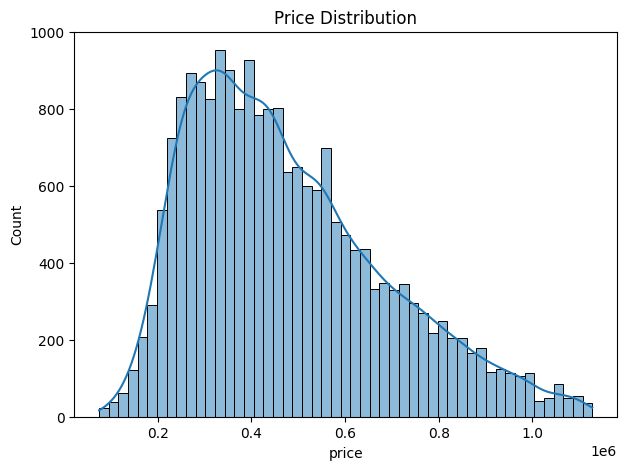

In [ ]:
#Distribution of price
plt.figure(figsize=(7,5))
sns.histplot(df["price"], kde=True)
plt.title("Price Distribution")
plt.show()


Boxplot for Price (Outlier Visualization)

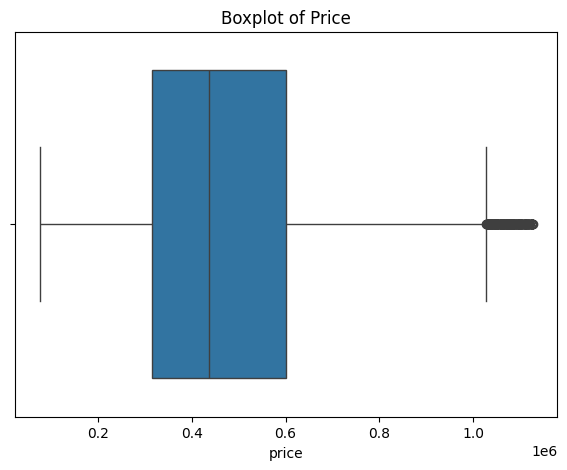

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x=df["price"])
plt.title("Boxplot of Price")
plt.show()


Scatterplot (Sqft Living vs Price)

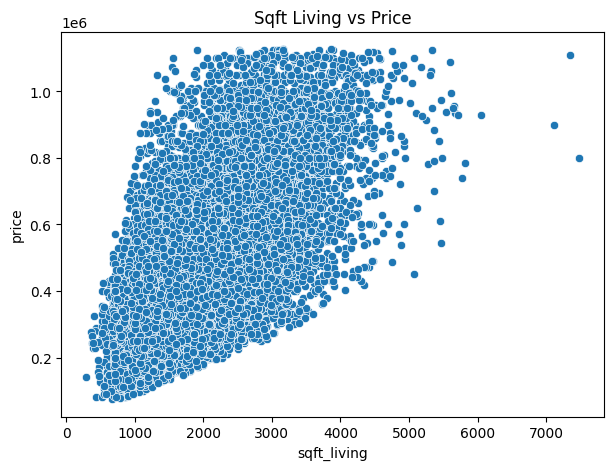

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df["sqft_living"], y=df["price"])
plt.title("Sqft Living vs Price")
plt.show()


Countplot for Bedrooms

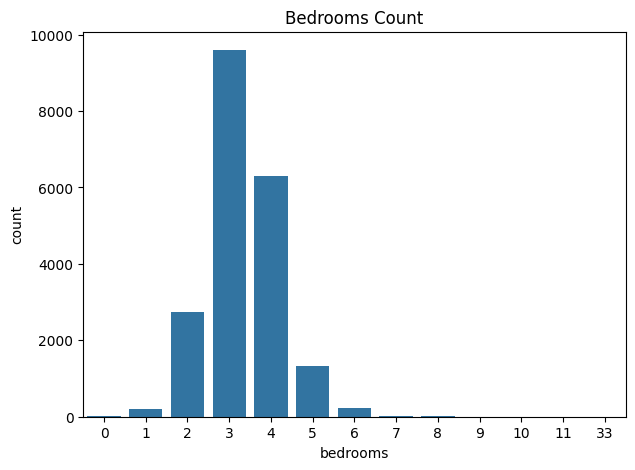

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x=df["bedrooms"])
plt.title("Bedrooms Count")
plt.show()


# **8. Feature Selection**

In [ ]:
X = df.drop("price", axis=1)
y = df["price"]


# **9. Train–Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# **10. Scale the Data**

In [ ]:
scaler = StandardScaler()
# Drop the 'date' column from X_train and X_test before scaling
X_train = X_train.drop('date', axis=1)
X_test = X_test.drop('date', axis=1)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **11. Train All Models**

Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


XGBoost Regressor

In [ ]:
xgb = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


# **12. Model Evaluation Function**

In [ ]:
def evaluate(model_name, y_test, y_pred):
    print(f"\n----- {model_name} -----")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))


13. Evaluate All Models

In [ ]:
evaluate("Linear Regression", y_test, y_pred_lr)
evaluate("Random Forest", y_test, y_pred_rf)
evaluate("XGBoost", y_test, y_pred_xgb)



----- Linear Regression -----
MAE: 86169.92633307198
MSE: 13044248049.807161
R2 Score: 0.6867680242544653

----- Ridge Regression -----
MAE: 86169.61081679128
MSE: 13044206294.745264
R2 Score: 0.6867690269201985

----- Lasso Regression -----
MAE: 86169.66900929857
MSE: 13044231795.096899
R2 Score: 0.6867684145793802

----- Random Forest -----
MAE: 52368.889597602174
MSE: 5876908879.389774
R2 Score: 0.858877585542775

----- XGBoost -----
MAE: 50258.640625
MSE: 5273945600.0
R2 Score: 0.8733565807342529


# **14. Residual Plot**

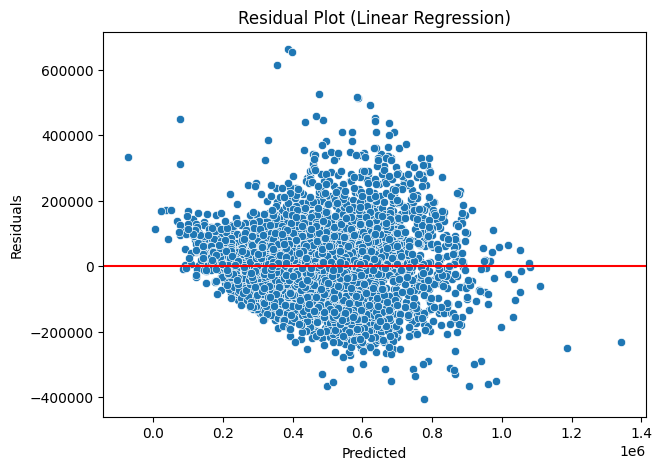

In [ ]:
residuals = y_test - y_pred_lr

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred_lr, y=residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linear Regression)")
plt.show()


15. Predict New House Price

In [ ]:
# The model expects 19 features: 'id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'
# Please provide values for all 19 features in the correct order.
new_data = [[7129300520, 3, 2.25, 2570, 7242, 2.0, 0, 0, 3, 7, 2170, 400, 1951, 1991, 98125, 47.7210, -122.319, 1690, 7639]]  # Example input with 19 features

new_data = scaler.transform(new_data)
predicted_price = xgb.predict(new_data)

print(f"Predicted House Price = ${predicted_price[0]:,.2f}")

Predicted House Price = $523,743.69


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
